In [4]:
import numpy as np

In [16]:
X = np.array([[2,4,6,7,7],[1,2,4,3,2]])
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [6]:
X_with_intercept

array([[1., 2., 4., 6., 7., 7.],
       [1., 1., 2., 4., 3., 2.]])

In [12]:
np.ones((X.shape[0], 1))

array([[1.],
       [1.]])

In [9]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [15]:
listeX1 = [1,2,3,4,5,6,7,8,9,10]
listeX2 = [2,4,6,7,7,7,8,10,12,13]
listeX3 = [1,2,4,3,2,1,1,2,4,3]
listeY = [3,9,11,15,13,13,17,21,25,27]
X = np.array([[*listeX1],[*listeX2],[*listeX3]])
y = np.array(listeY)
print(X,y)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  7  7  7  8 10 12 13]
 [ 1  2  4  3  2  1  1  2  4  3]] [ 3  9 11 15 13 13 17 21 25 27]


[[ 1  2  1]
 [ 2  4  2]
 [ 3  6  4]
 [ 4  7  3]
 [ 7  8  1]
 [ 8 10  2]
 [ 9 12  4]
 [10 13  3]] [ 3  9 11 15 17 21 25 27]
[14.90917912]


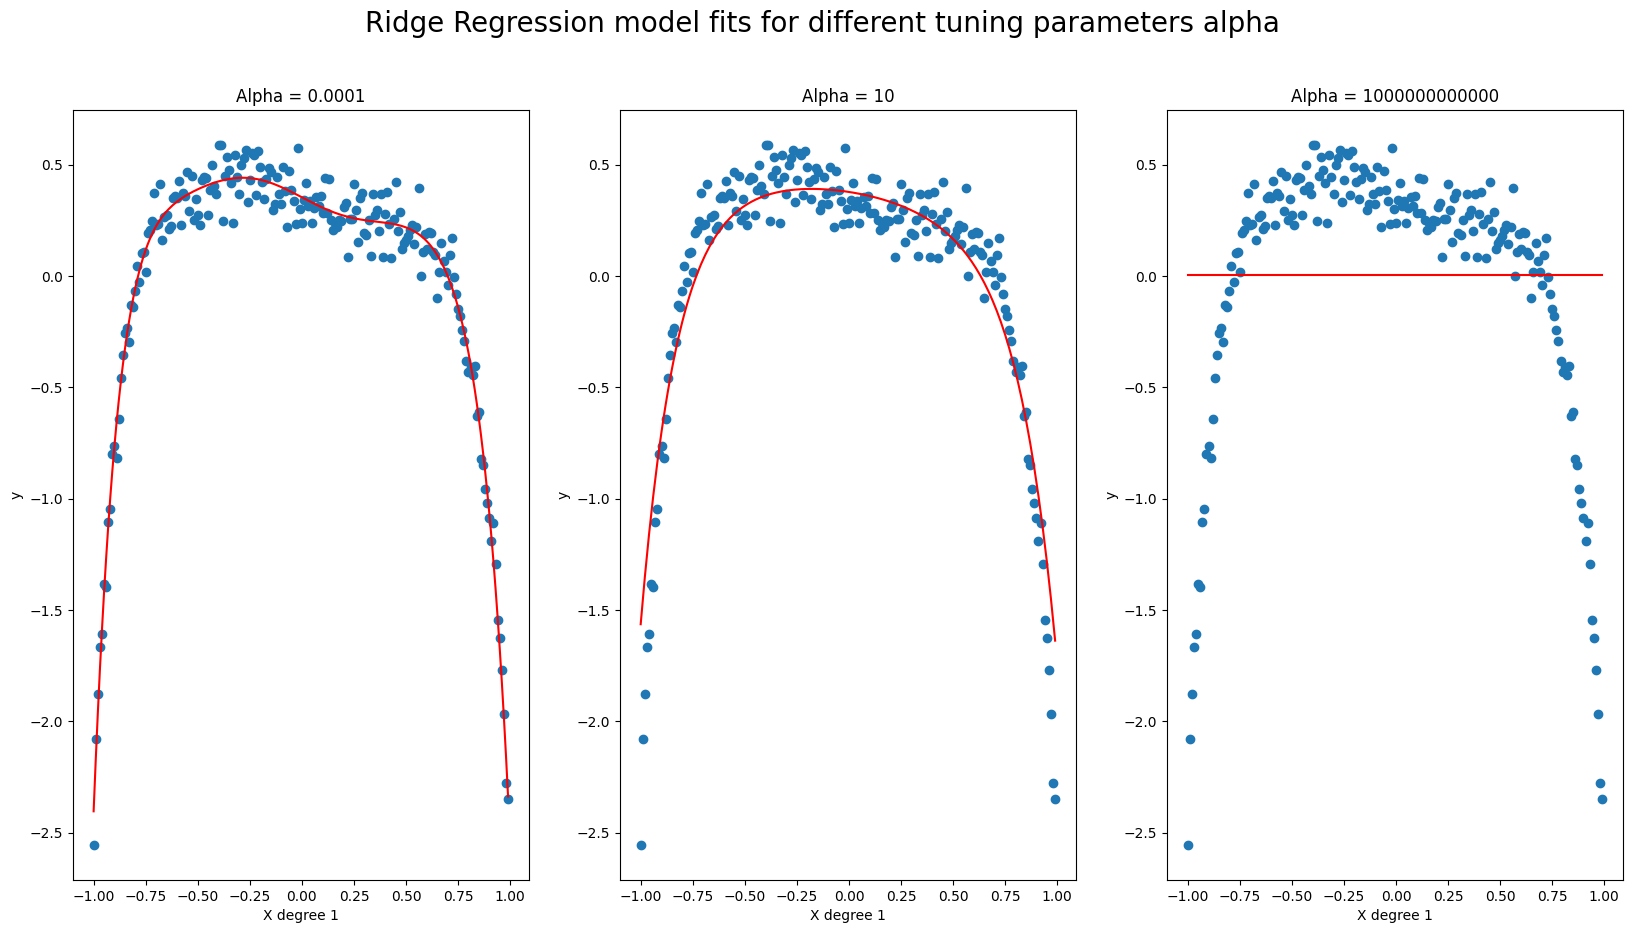

In [17]:
import numpy as np

class RidgeRegScratch():
  # include solver parameter for flexible implementation of gradient descent
  # solution in future, alpha is used in place of lambda to mimic scikit-learn
  def __init__(self, alpha=1.0, solver='closed'):
      self.alpha = alpha
      self.solver = solver

  def fit(self, X, y):
      X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
      self.X_intercept = X_with_intercept
      if self.solver == 'closed':
          # number of columns in matrix of X including intercept
          dimension = X_with_intercept.shape[1]
          # Identity matrix of dimension compatible with our X_intercept Matrix
          A = np.identity(dimension)
          # set first 1 on the diagonal to zero so as not to include a bias term for
          # the intercept
          A[0, 0] = 0
          # We create a bias term corresponding to alpha for each column of X not
          # including the intercept
          A_biased = self.alpha * A
          thetas = np.linalg.inv(X_with_intercept.T.dot(
              X_with_intercept) + A_biased).dot(X_with_intercept.T).dot(y)
      self.thetas = thetas
      return self

  def predict(self, X):
      thetas = self.thetas
      X_predictor = np.c_[np.ones((X.shape[0], 1)), X]
      self.predictions = X_predictor.dot(thetas)
      return self.predictions




listeX1 = [1,2,3,4,7,8,9,10]
listeX2 = [2,4,6,7,8,10,12,13]
listeX3 = [1,2,4,3,1,2,4,3]
listeY = [3,9,11,15,17,21,25,27]
X = np.array([[*listeX1],[*listeX2],[*listeX3]]).T
y = np.array(listeY)
print(X,y)

model = RidgeRegScratch()
model.fit(X,y)
listeX1 = [6]
listeX2 = [7]
listeX3 = [1]
X_test = np.array([[*listeX1],[*listeX2],[*listeX3]]).T
print(model.predict(X_test))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures



def make_x_y(deg=2):
  """ Return random X and y predictions, with X having polynomial features of degree
  deg for purpose of visualizing effects of alpha parameter"""
  
  X = np.array([*range(-100,100)]).reshape(-1,1) / 100

  poly_adder = PolynomialFeatures(degree=deg)
  X = poly_adder.fit_transform(X)

  thetas = np.array(np.random.randn(deg+1,1)).reshape(-1,1)

  y = X.dot(thetas)
  y += np.random.normal(loc=0, scale=.1, size=(len(y),1))
  return X, y

X, y = make_x_y(deg=9)

def plot_alphas(X,y, alphas=[0.0001, 10, 1000000000000], show_degree=1):
  """ Return fig object showing the model fits for given values of alpha,
  user can choose to view different degrees of X (although this may not make linear sense
  in many cases, by changing the show_degree parameter), in this event the user should set the random
  state before generating X and y to ensure they are viewing the same data"""
  
  fig, (ax, ax1, ax2) = plt.subplots(1, len(alphas), figsize=(20,10))
  for alpha_, ax_ in zip(alphas, [ax, ax1, ax2]):
      model = RidgeRegScratch(alpha=alpha_)
      model.fit(X,y)
      # uncomment the below line to show the predicted coefficients for each iteration of alpha
      # note, that the coefficient theta_0 remains very similar, while all other coefficients
      # get progressively smaller as alpha grows larger

      # print(f'thetas for alpha = {alpha_}: {model.thetas.T}')
      predictions = model.predict(X)
      ax_.scatter(X[:, show_degree], y)
      ax_.plot(X[:, show_degree], predictions, color='red')
      ax_.set_title(f'Alpha = {alpha_}')
      ax_.set_ylabel('y')
      ax_.set_xlabel(f'X degree {show_degree}')
  fig.suptitle('Ridge Regression model fits for different tuning parameters alpha', size=20)
  fig.show()
  return fig

fig_alphas = plot_alphas(X, y, show_degree=1)
fig_alphas.show()